In [1]:

# Styling notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("style.css", "r").read()
    return HTML(styles)
css_styling()

# SERIES TEMPORALES Y VISUALIZACIÓN

## Bibliografía
<div class="exercise">
https://otexts.com/fpp3/graphics.html
</div>

# 1. Manipulación básica de series temporales con pandas

https://www.analyticslane.com/2018/08/15/manipulacion-series-temporales-con-pandas/

## Creación de un rango de fechas
<div class="hr"></div>
La manipulación de series temporales con pandas requiere que en primer lugar se importen los datos. Los datos se pueden importar empleado las herramientas que provee pandas para trabajar con diferentes tipos de archivos, como son los CSV o Excel.

En primer lugar, se ha de crear **un rango de fechas para la serie temporal**. Esto se puede conseguir mediante el método **date_range** de pandas. El rango de fechas requiere que se le indique la fecha de inicio, la fecha final y el número de periodos, la fecha de inicio, la fecha final y la frecuencia o el número de periodos, la frecuencia y alguna de las dos fechas.



In [2]:
import pandas as pd
from datetime import datetime
import numpy as np

date_rng = pd.date_range(start='2021/07/01', end='2021/07/15', freq='3H')
date_rng

DatetimeIndex(['2021-07-01 00:00:00', '2021-07-01 03:00:00',
               '2021-07-01 06:00:00', '2021-07-01 09:00:00',
               '2021-07-01 12:00:00', '2021-07-01 15:00:00',
               '2021-07-01 18:00:00', '2021-07-01 21:00:00',
               '2021-07-02 00:00:00', '2021-07-02 03:00:00',
               ...
               '2021-07-13 21:00:00', '2021-07-14 00:00:00',
               '2021-07-14 03:00:00', '2021-07-14 06:00:00',
               '2021-07-14 09:00:00', '2021-07-14 12:00:00',
               '2021-07-14 15:00:00', '2021-07-14 18:00:00',
               '2021-07-14 21:00:00', '2021-07-15 00:00:00'],
              dtype='datetime64[ns]', length=113, freq='3H')

In [3]:
date_rng = pd.date_range(start='2021/07/01', end='2021/07/15', freq='D')
date_rng

DatetimeIndex(['2021-07-01', '2021-07-02', '2021-07-03', '2021-07-04',
               '2021-07-05', '2021-07-06', '2021-07-07', '2021-07-08',
               '2021-07-09', '2021-07-10', '2021-07-11', '2021-07-12',
               '2021-07-13', '2021-07-14', '2021-07-15'],
              dtype='datetime64[ns]', freq='D')

In [4]:
date_rng = pd.date_range(start='2021/07/01', end='2021/11/15', freq='W')
date_rng

DatetimeIndex(['2021-07-04', '2021-07-11', '2021-07-18', '2021-07-25',
               '2021-08-01', '2021-08-08', '2021-08-15', '2021-08-22',
               '2021-08-29', '2021-09-05', '2021-09-12', '2021-09-19',
               '2021-09-26', '2021-10-03', '2021-10-10', '2021-10-17',
               '2021-10-24', '2021-10-31', '2021-11-07', '2021-11-14'],
              dtype='datetime64[ns]', freq='W-SUN')

In [5]:
date_rng = pd.date_range(start='2021/07/01', end='2021/11/15', freq='m')
date_rng

DatetimeIndex(['2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31'], dtype='datetime64[ns]', freq='M')

In [6]:
date_rng = pd.date_range(start='2018/07/01', end='2021/11/15', freq='q')
date_rng

DatetimeIndex(['2018-09-30', '2018-12-31', '2019-03-31', '2019-06-30',
               '2019-09-30', '2019-12-31', '2020-03-31', '2020-06-30',
               '2020-09-30', '2020-12-31', '2021-03-31', '2021-06-30',
               '2021-09-30'],
              dtype='datetime64[ns]', freq='Q-DEC')

## Creación de series temporales con pandas

A partir del rango de fechas se puede crear una DataFrame con valores. Para esto se puede utilizar la función randint con la que se pueden conseguir número aleatorios en un rango. 

In [7]:
date_rng = pd.date_range(start='2015/07/01', end='2021/11/15', freq='m')
date_rng


DatetimeIndex(['2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31',
               '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29',
               '2016-03-31', '2016-04-30', '2016-05-31', '2016-06-30',
               '2016-07-31', '2016-08-31', '2016-09-30', '2016-10-31',
               '2016-11-30', '2016-12-31', '2017-01-31', '2017-02-28',
               '2017-03-31', '2017-04-30', '2017-05-31', '2017-06-30',
               '2017-07-31', '2017-08-31', '2017-09-30', '2017-10-31',
               '2017-11-30', '2017-12-31', '2018-01-31', '2018-02-28',
               '2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30',
               '2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31',
               '2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28',
               '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30',
               '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
               '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29',
      

In [8]:
ts = pd.DataFrame(date_rng, columns=['date'])
ts['data'] = np.random.randint(0,100,size=(len(date_rng)))
ts.head(5)

,date,data
0,2015-07-31,88
1,2015-08-31,66
2,2015-09-30,61
3,2015-10-31,52
4,2015-11-30,14


<AxesSubplot:>

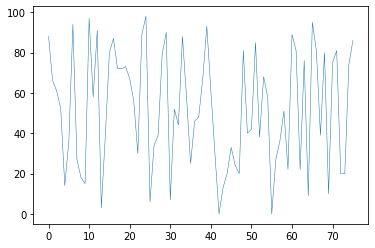

In [9]:
ts.data.plot(linewidth=0.5)

In [10]:
ts = ts.set_index('date')
ts.head(5)

,data
date,
2015-07-31,88
2015-08-31,66
2015-09-30,61
2015-10-31,52
2015-11-30,14


<AxesSubplot:xlabel='date'>

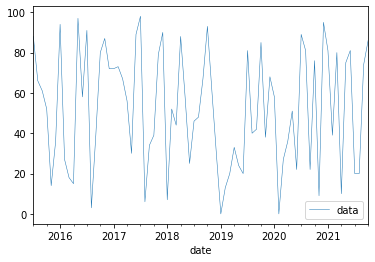

In [11]:
ts.plot(linewidth=0.5)

## Funciones básicas para la manipulación básica de series temporales con pandas
Una de las primeras operaciones que se puede realizar con la serie temporal el seleccionar un periodo de tiempo.

In [12]:
ts.loc['2017-08-31']

data    6
Name: 2017-08-31 00:00:00, dtype: int64

In [13]:
ts.loc['2018/07']

,data
date,
2018-07-31,46


In [14]:
ts.loc['2018']

,data
date,
2018-01-31,7
2018-02-28,52
2018-03-31,44
2018-04-30,88
2018-05-31,58
2018-06-30,25
2018-07-31,46
2018-08-31,48
2018-09-30,67


In [15]:
ts.loc['2018/07': '2020/01']

,data
date,
2018-07-31,46
2018-08-31,48
2018-09-30,67
2018-10-31,93
2018-11-30,61
2018-12-31,30
2019-01-31,0
2019-02-28,13
2019-03-31,20


## Remuestreo de las series temporales

Los datos que se han utilizado hasta ahora tienen una frecuencia horaria. En el caso de que se desee los datos con otra frecuencia estos se pueden remuestrear. Esto se consigue con el método resample, al que se le ha de indicar el periodo y a su resultado se le puede aplicar una operación

In [16]:
ts.resample('q').mean()

,data
date,
2015-09-30,71.666667
2015-12-31,34.000000
2016-03-31,46.333333
2016-06-30,56.666667
2016-09-30,44.333333
2016-12-31,79.666667
2017-03-31,70.666667
2017-06-30,58.333333
2017-09-30,46.000000


In [17]:
ts.resample('q').sum()

,data
date,
2015-09-30,215
2015-12-31,102
2016-03-31,139
2016-06-30,170
2016-09-30,133
2016-12-31,239
2017-03-31,212
2017-06-30,175
2017-09-30,138


In [18]:
ts.resample('y').last()

,data
date,
2015-12-31,36
2016-12-31,72
2017-12-31,90
2018-12-31,30
2019-12-31,68
2020-12-31,95
2021-12-31,86


## Ventana móvil

Las estadísticas se pueden obtener también mediante una ventana móvil. Para ello se ha de utilizar el método rolling al que se le ha de indicar el número de periodos.

In [19]:
ts.rolling(3).mean()


,data
date,
2015-07-31,NaN
2015-08-31,NaN
2015-09-30,71.666667
2015-10-31,59.666667
2015-11-30,42.333333
...,...
2021-06-30,55.333333
2021-07-31,58.666667
2021-08-31,40.333333


In [20]:
ts.rolling(12).std()

,data
date,
2015-07-31,NaN
2015-08-31,NaN
2015-09-30,NaN
2015-10-31,NaN
2015-11-30,NaN
...,...
2021-06-30,31.950245
2021-07-31,32.750087
2021-08-31,33.205513


## Diferenciación 
La diferenciación es a menudo una herramienta útil que puede formar parte de los algoritmos de series de tiempo.

In [21]:
ts.diff()

,data
date,
2015-07-31,NaN
2015-08-31,-22.0
2015-09-30,-5.0
2015-10-31,-9.0
2015-11-30,-38.0
...,...
2021-06-30,6.0
2021-07-31,-61.0
2021-08-31,0.0


In [22]:
ts.resample("y").median().diff()

,data
date,
2015-12-31,NaN
2016-12-31,8.5
2017-12-31,4.5
2018-12-31,-19.5
2019-12-31,-14.5
2020-12-31,8.0
2021-12-31,31.0


# 2. Visualización de Series temporales

## Gráfico temporal

Vamos a leer datos de ventas trimestrales de Coca-Cola de un ficehro csv .

In [23]:
ko_df = pd.read_csv('data/01/ko.csv',sep=';')
ko_df['Fecha'] = pd.to_datetime(ko_df['Fecha'],format="%Y%m%d")
ko_df = ko_df.set_index('Fecha')
ko_df.head()

,Ingresos
Fecha,
2021-06-03,10129
2021-03-03,9020
2020-12-31,8611
2020-09-26,8652
2020-06-27,7150


In [24]:
ko_ts=ko_df.resample("q").last()
ko_ts.tail()

,Ingresos
Fecha,
2020-06-30,7150
2020-09-30,8652
2020-12-31,8611
2021-03-31,9020
2021-06-30,10129


<AxesSubplot:xlabel='Fecha'>

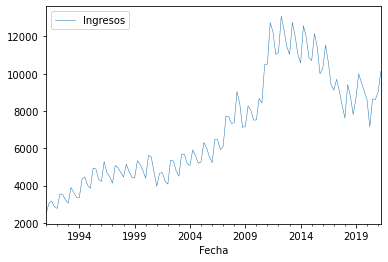

In [25]:
ko_ts.plot(linewidth=0.5)

## Patrones (Componentes) de series de tiempo

Al describir las series de tiempo, hemos utilizado palabras como "tendencia" y "estacional", que deben definirse con más cuidado.

### Tendencia
Existe una tendencia cuando hay un aumento o disminución a largo plazo en los datos. No tiene por qué ser lineal. A veces nos referiremos a una tendencia como "cambio de dirección", cuando puede pasar de una tendencia creciente a una tendencia decreciente. 

### Estacional
Un patrón estacional ocurre cuando una serie de tiempo se ve afectada por factores estacionales como la época del año o el día de la semana. La estacionalidad es siempre de un período fijo y conocido. 

### Cíclico
Un ciclo ocurre cuando la exhibición de datos sube y baja que no son de una frecuencia fija. Estas fluctuaciones generalmente se deben a las condiciones económicas y, a menudo, están relacionadas con el "ciclo económico". La duración de estas fluctuaciones suele ser de al menos 2 años.

Mucha gente confunde el comportamiento cíclico con el comportamiento estacional, pero en realidad son bastante diferentes. Si las fluctuaciones no son de una frecuencia fija, entonces son cíclicas; si la frecuencia no cambia y está asociada con algún aspecto del calendario, entonces el patrón es estacional. En general, la duración media de los ciclos es mayor que la duración de un patrón estacional, y las magnitudes de los ciclos tienden a ser más variables que las magnitudes de los patrones estacionales.


![0102](img/01/01_img_02.png)

## Gráficos Estacionales

Una gráfica estacional es similar a una gráfica de tiempo, excepto que los datos se grafican contra las “estaciones” individuales en las que se observaron los datos.

In [26]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})


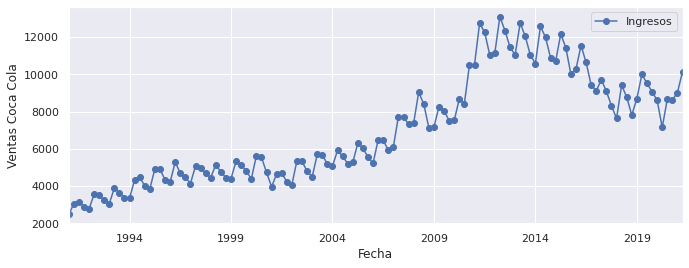

In [27]:

ax = ko_ts.plot(marker='o', linestyle='-')
ax.set_ylabel('Ventas Coca Cola');

In [28]:
import statsmodels.api as sm
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Comportamiento Estacional')

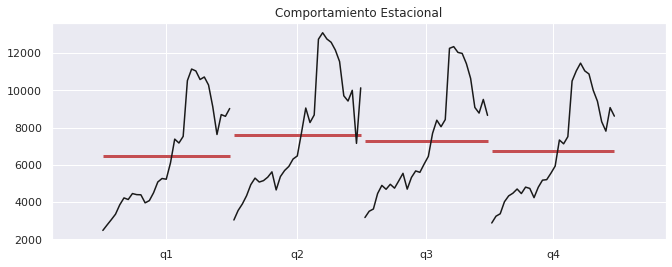

In [29]:
ax = plt.gca()
sm.graphics.tsa.quarter_plot(ko_ts['Ingresos'],ax=ax)
ax.set_title('Comportamiento Estacional')

Text(0.5, 0, '')

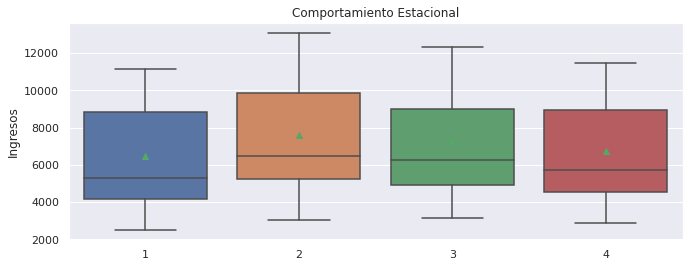

In [30]:
#Seasonal Events
ko_ts['Q'] = ko_ts.index.quarter

sns.boxplot(data=ko_ts, x='Q', y='Ingresos',showmeans=True)
ax = plt.gca()
ax.set_ylabel('Ingresos')
ax.set_title('Comportamiento Estacional')
ax.set_xlabel('')

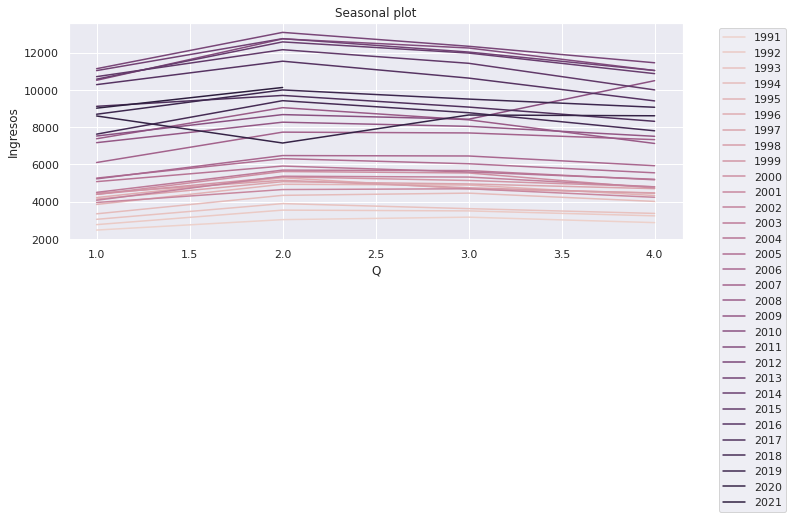

In [31]:
ko_ts['Y'] = ko_ts.index.year
sns.lineplot(data=ko_ts, 
             x='Q', 
             y='Ingresos', 
             hue='Y', 
             legend='full')

# add title
plt.title('Seasonal plot')

# move the legend outside of the main figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

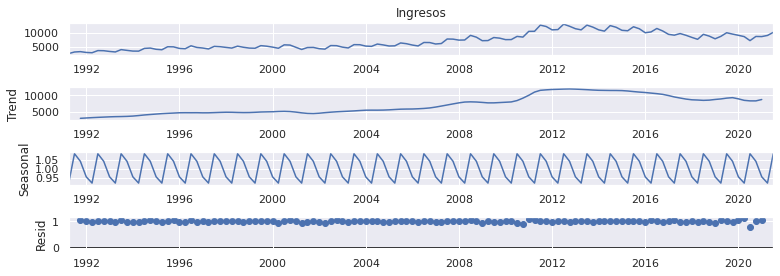

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ko_ts['Ingresos'], 
                                   model='multiplicative', 
                                   period=4)
decomposition.plot();